In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jagritigautam","key":"c8cee406f84343deb8138575c9bffbc1"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                        title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                             Apple Quality                                     170KB  2024-01-11 14:31:07          12801        298  1.0              
shiivvvaam/bitcoin-historical-data                         Bitcoin Historical Data                            95KB  2024-02-09 17:37:27            306         30  1.0              
nelgiriyewithana/emotions                                  Emotions                                           16MB  2024-02-05 16:01:39            986         54  1.0              
kanchana1990/2024-amazon-best-sellers-top-valentine-gifts  2024 Amazon Best Sellers: Top Valent

In [ ]:
!kaggle datasets download -d kazanova/sentiment140

 93% 75.0M/80.9M [00:00<00:00, 161MB/s]
100% 80.9M/80.9M [00:00<00:00, 168MB/s]


In [ ]:
!unzip sentiment140.zip

Archive:  sentiment140.zip
replace training.1600000.processed.noemoticon.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: Sentiment.csv
  inflating: Sentiment.csv           


In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv("Sentiment.csv",encoding='latin-1')

In [ ]:
import nltk
nltk.download('stopwords')   #stopwords --words that do not have that much importnce to the context

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
df.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [ ]:
column_names=['Target','Tweet_Id','Date','Flag','User','Text']
df=pd.read_csv("Sentiment.csv",encoding='latin-1',names=column_names)

In [ ]:
df=df.rename(columns={'0':'Target','1467810369':'Tweet_Id','Mon Apr 06 22:19:45 PDT 2009':'Date','NO_QUERY':'Flag','_TheSpecialOne_':'User',"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D":"Text"})

In [ ]:
df.shape


(1600000, 6)

In [ ]:
df.head()

,Target,Tweet_Id,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.isnull().sum()


Target      0
Tweet_Id    0
Date        0
Flag        0
User        0
Text        0
dtype: int64

In [ ]:
df['Target'].value_counts()

0    800000
4    800000
Name: Target, dtype: int64

In [ ]:
df.replace({'Target':{4:1}}, inplace=True)


In [ ]:
df['Target'].value_counts()

0    800000
1    800000
Name: Target, dtype: int64

0-negative tweets 1-positive tweets

In [ ]:
# STEMMING :PROCESS OF REDUCING A WORD TO ITS ROOT WORD

In [ ]:
port_stem=PorterStemmer()
def stemming(context):
  stemmed_context=re.sub('[^a-zA-Z]',' ',context)  #only alphabets ,remove others
  stemmed_context=stemmed_context.lower()
  stemmed_context=stemmed_context.split()
  stemmed_context=[port_stem.stem(word) for word in stemmed_context if not word in stopwords.words('english')]
  stemmed_context=' '.join(stemmed_context)
  return stemmed_context


In [ ]:
df['stemmed_content']=df['Text'].apply(stemming)

In [ ]:
df.head()

,Target,Tweet_Id,Date,Flag,User,Text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [ ]:
print(df['stemmed_content'])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: stemmed_content, Length: 1600000, dtype: object


In [ ]:
print(df['Target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: Target, Length: 1600000, dtype: int64


In [ ]:
x=df['stemmed_content'].values
y=df['Target'].values

In [ ]:
print(x)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [ ]:
print(y)

[0 0 0 ... 1 1 1]


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(X_train.shape,X_test.shape)

(1280000,) (320000,)


In [ ]:
print(X_train)


['bad feel' 'love weekend' 'littlew bit far day trip fun get muddi today'
 ... 'twitter follow reform famou peopl'
 'aria cut hand open morn say like mommi anymor'
 'charlii sweet im excit aww miss u guy today']


In [ ]:
print(X_test)

['brodiejay oh im go wow mona vale real place afteral know suck mvill slow train pffft'
 'babi grow' 'paint black roll stone best' ...
 'belladonna miss good music' 'reec r know imma get'
 'ooooooohnoooooo forgot charg ipod work one sad littl bar left']


FEATURE EXTRACTION:CONVERTING THE TEXTUAL DATA INTO NUMERICAL DATA VECTORIZER

In [ ]:
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

SENTIMENT ANALYSIS USINNG VADER AND ROBERTA PRETRAINED MODEL FROM HUGGING FACE

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [ ]:
df['Target'].value_counts()

0    800000
1    800000
Name: Target, dtype: int64

<Axes: title={'center': 'Count of positive and negative reviews'}>

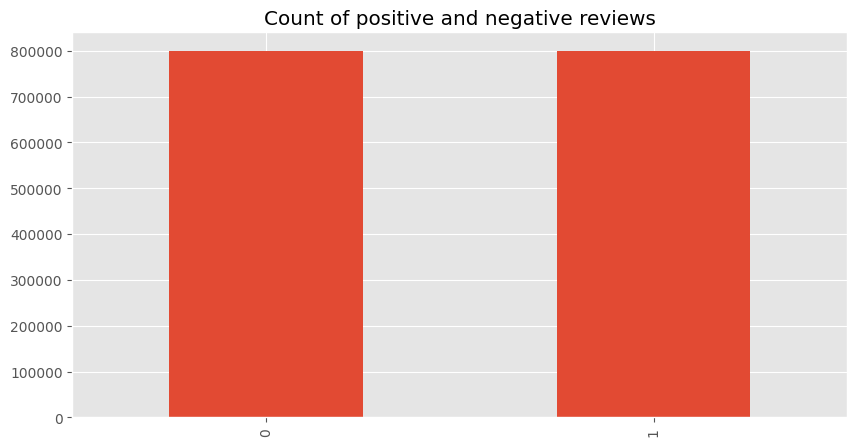

In [ ]:
df['Target'].value_counts().sort_index().plot(kind='bar',title='Count of positive and negative reviews',figsize=(10,5))

In [ ]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia=SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [ ]:
sia.polarity_scores('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
df.insert(0, 'Id', range(0, 0+ len(df)))
df

,Id,Target,Tweet_Id,Date,Flag,User,Text,stemmed_content
0,0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see
...,...,...,...,...,...,...,...,...
1599995,1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,woke school best feel ever
1599996,1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdb com cool hear old walt interview http b...
1599997,1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,readi mojo makeov ask detail
1599998,1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happi th birthday boo alll time tupac amaru sh...


In [ ]:
#Run the polarity scores on the entire dataset
res={}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text=row['Text']
  myid=row['Id']
  res[myid]=sia.polarity_scores(text)

  0%|          | 0/1600000 [00:00<?, ?it/s]

In [ ]:
res

{0: {'neg': 0.129, 'neu': 0.745, 'pos': 0.126, 'compound': -0.0173},
 1: {'neg': 0.303, 'neu': 0.697, 'pos': 0.0, 'compound': -0.75},
 2: {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.4939},
 3: {'neg': 0.321, 'neu': 0.5, 'pos': 0.179, 'compound': -0.25},
 4: {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'compound': -0.6597},
 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 6: {'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'compound': 0.4767},
 7: {'neg': 0.093, 'neu': 0.548, 'pos': 0.359, 'compound': 0.745},
 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 10: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.308, 'neu': 0.692, 'pos': 0.0, 'compound': -0.5994},
 13: {'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'compound': -0.1027},
 14: {'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.3724},
 15: {'neg': 0.083, 'neu': 0.73, 'p

In [ ]:
df.head()

,Id,Target,Tweet_Id,Date,Flag,User,Text,stemmed_content
0,0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [ ]:
vaders=pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
0,0.129,0.745,0.126,-0.0173
1,0.303,0.697,0.000,-0.7500
2,0.000,0.833,0.167,0.4939
3,0.321,0.500,0.179,-0.2500
4,0.241,0.759,0.000,-0.6597
...,...,...,...,...
1599995,0.138,0.503,0.358,0.5423
1599996,0.000,0.757,0.243,0.4376
1599997,0.000,0.800,0.200,0.3612
1599998,0.000,0.706,0.294,0.6784


In [ ]:
common_columns = set(vaders.columns).intersection(set(df.columns))
print(common_columns)

set()


In [ ]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df,how='left')

In [ ]:
vaders.head()

,Id,neg,neu,pos,compound,Target,Tweet_Id,Date,Flag,User,Text,stemmed_content
0,0,0.129,0.745,0.126,-0.0173,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,1,0.303,0.697,0.000,-0.7500,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,2,0.000,0.833,0.167,0.4939,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,3,0.321,0.500,0.179,-0.2500,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,4,0.241,0.759,0.000,-0.6597,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


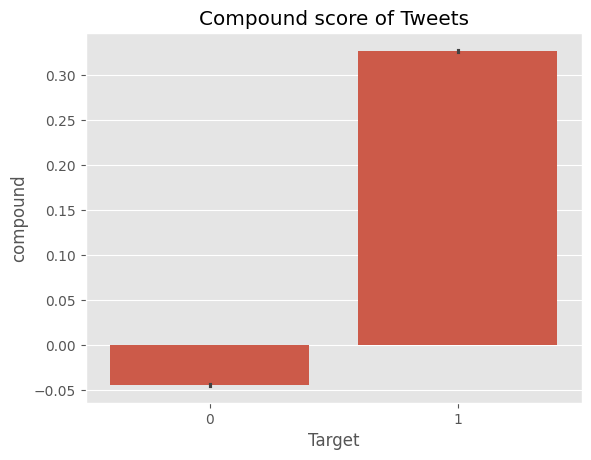

In [ ]:
an=sns.barplot(data=vaders,x='Target',y='compound')
an.set_title('Compound score of Tweets')
plt.show()

*ROBERTA* PRETRAINED MODEL : ACCOUNT TO THE CONTEXT OF THE WORLD ALSO

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
Model=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(Model)
model=AutoModelForSequenceClassification.from_pretrained(Model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
def polarity_scores_roberta(Text):
  encoded_text=tokenizer(text,return_tensors='pt')
  output=model(**encoded_text)
  scores=output[0][0].detach().numpy()
  scores=softmax(scores)
  scores_dict={
      'roberta_neg':scores[0],
      'roberta_neu':scores[1],
      'roberta_pos':scores[2]
  }
  return scores_dict

In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm

In [ ]:
res={}
for i, row in tqdm(df.iterrows(),total=len(df)):
  try:
    text=row['Text']
    myid=row['Id']
    vader_result=sia.polarity_scores(text)
    vader_result_rename={}
    for key,value in vader_result.items():
      vader_result_rename[f"vader_{key}"]=value
    roberta_result=polarity_scores_roberta(text)
    both={**vader_result,**roberta_result}
    res[myid]=both
  except RuntimeError:
    print(f'Broke for id{myid}')

NameError: name 'df' is not defined

In [ ]:
results_df=pd.DataFrame(res).T
results_df=results_df.reset_index().rename(columns={'index':'Id'})
resuts_df=results_df.merge(df,how='left')

In [ ]:
results_df.head()

COMPARE THE RESULTS BETWEEN THE MODELS

In [ ]:
results_df.columns

In [ ]:
sns.pairplot(data=results_df,var=['vader_neg','vader_neu','vader_pos','roberta_neg','roberta_neu','roberta_pos'],
             hue='Target',
             palette='tab10')
plt.show()

THE TRANSFORMER PIPELINE

In [2]:
from transformers import pipeline
sent_pipeline=pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [3]:
sent_pipeline('I love Sentiment analysis')

[{'label': 'POSITIVE', 'score': 0.999736487865448}]

In [5]:
sent_pipeline('I love being ignored')

[{'label': 'NEGATIVE', 'score': 0.966443657875061}]